## 2.2.1 Importaion des bibliothèques

In [64]:
import numpy as np
import pandas as pd
from scipy.io import arff
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from matplotlib import pyplot as plt
import seaborn as sns
from seaborn import axes_style
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import neighbors, metrics,svm, datasets, preprocessing, model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

!pip install nashpy
import nashpy as nash

In [88]:
df = pd.read_csv('Iris.csv')
df.isnull().sum()
df.duplicated().sum()
df = df.astype(str).apply(LabelEncoder().fit_transform)
df=df.drop('Id',axis=1)
# fig=plt.figure(figsize=(25,12))
# sns.boxplot(data=df)
# plt.show()
# fig2 = plt.figure(figsize=(30,25))
# sns.heatmap(df.corr(),vmax=1.0,vmin=-1.0,annot=True)
# df.hist(bins=4,figsize=(30,30))
# plt.show()
miss_percentage=0.3
def miss_U(U,miss_percentage):         #其中U代表初始集合的pandas对象
    missing_rows = int(miss_percentage*len(U))
    for i in range(missing_rows):
        row_index = np.random.randint(0,len(U))
        col_index = np.random.randint(0,len(U.columns)-1) #-1的原因是最后一列是class不能添加缺失值
        U.iloc[row_index,col_index] = np.nan
    return U
df_Iris = miss_U(df,miss_percentage)
df_Iris = df_Iris.rename(columns={df.columns[4]:'Class/ASD'})
df_U = df_Iris.copy()
print("初始数据集df_U:\n",df_U)
set_M = df_U[df_U.isnull().values.any(axis=1)]
print("set_M:\n",set_M)
set_CC = df_U[~df_U.isnull().values.any(axis=1)]
set_C = df_U[~df_U.isnull().values.any(axis=1)]
print("set_C:\n",set_C)
num_clusters = len(df_U["Class/ASD"].value_counts())
print("聚类数目num_clusters:\n",num_clusters)
kmeans = KMeans(n_clusters=num_clusters, max_iter=50)       #n_clusters表示计算的聚类个数
kmeans.fit(set_C)
set_C['Cluster'] = kmeans.labels_

#标签匹配
# 假设有一个数据集 set_C，标签列为 "Class/ASD"，聚类结果的标签列为 "cluster"
# set_C = ...  # 数据集
class_labels = set_C["Class/ASD"].values
kmeans_labels = set_C["Cluster"].values
# 创建一个字典，将 K-means 的标签映射到原始数据集的标签
label_mapping = {}
for kmeans_label in np.unique(kmeans_labels):
    mask = (kmeans_labels == kmeans_label)
    original_label = np.argmax(np.bincount(class_labels.astype(int)[mask]))
    label_mapping[kmeans_label] = original_label
# 将 K-means 的标签映射到原始数据集的标签
mapped_labels = np.array([label_mapping[label] for label in kmeans_labels])
set_C['Cluster'] = mapped_labels
# 打印映射后的标签和原始标签
print("Mapped Labels:", mapped_labels)
print("Original Labels:", class_labels)

diff_count = set_C["Class/ASD"].ne(set_C["Cluster"]).sum()#比较不同元素的个数
set_C_diff = set_C.loc[set_C["Class/ASD"].ne(set_C["Cluster"]), ["Class/ASD", "Cluster"]]
print("本该属于的class和聚类所得的cluster不一样的对象\n",set_C_diff)
count_set_C = len(set_C)
print("set_C总的样本个数是",count_set_C,"经过k-means聚类后错误的样本个数是",diff_count,"正确率为",(count_set_C-diff_count)/count_set_C)
# df.isnull().sum()
# df_U=df.copy()
# set_M = df_U[df_U.isnull().values.any(axis=1)]
# set_M

初始数据集df_U:
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Class/ASD
0              8.0          14.0            4.0           1.0          0
1              6.0           9.0            4.0           NaN          0
2              4.0          11.0            NaN           1.0          0
3              NaN          10.0            5.0           1.0          0
4              7.0          15.0            4.0           1.0          0
..             ...           ...            ...           ...        ...
145           24.0           9.0           28.0          19.0          2
146           20.0           4.0           26.0          15.0          2
147           22.0           9.0           28.0          16.0          2
148           19.0          13.0           30.0          19.0          2
149           16.0           9.0           27.0          14.0          2

[150 rows x 5 columns]
set_M:
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Class/ASD
1      

C:\Users\wzx\AppData\Local\Temp\ipykernel_14240\1557257073.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_C['Cluster'] = kmeans.labels_
C:\Users\wzx\AppData\Local\Temp\ipykernel_14240\1557257073.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_C['Cluster'] = mapped_labels


In [89]:
#对无缺失值对象集合进行诱导产生缺失值
print("set_C:\n",set_C)
# def addMissingValues(U,C):
#     for col in C.iloc[:,:-2]:
#             col_missing_rate = U[col].isna().mean()
#             vals_to_nan = C[col].dropna().sample(frac=col_missing_rate).index
#             C.loc[vals_to_nan, col] = np.NaN
#     return C
def addMissingValues(C,miss_percentage):         #其中U代表初始集合的pandas对象
    missing_rows = int(miss_percentage*len(C))
    print("missing_rows",missing_rows)
    for i in range(missing_rows):
        row_index = np.random.randint(0,len(C))
        col_index = np.random.randint(0,len(C.columns)-2) #-1的原因是最后一列是class不能添加缺失值
        C.iloc[row_index,col_index] = np.nan
        print(i,row_index,col_index)
    return C
set_C=addMissingValues(set_C,miss_percentage)
print(set_C.isnull().sum())
#划分集合Um和集合Uc
set_Um = set_C[set_C.isnull().values.any(axis=1)]
set_Uc=set_C[~set_C.isnull().values.any(axis=1)]
print("set_Um长度为",len(set_Um))
print("集合set_Um:\n",set_Um)
print("set_Uc长度为：\n",len(set_Uc))
print("集合set_Uc：\n",set_Uc)

#计算两个对象之间的距离
def dis(Oi,Oj,M,C):
    diff=0
    for i in M.columns[:-2]: #-2因为最后两列是决策属性
        diff +=np.nansum(M[i][Oi]-C[i][Oj])**2 #先选择列再选择行的链式操作，达到的效果是一样的
    return np.sqrt(diff)
#计算缺失值对象矩阵M和无缺失值对象矩阵C之间的距离
def distance(M,C):
    dist=[]
    l = -1
    for i in M.index:
        l = l+1
        dist.append([])
        for j in C.index:
            dist[l].append(dis(i,j,M,C))
    Table =pd.DataFrame(dist,M.index,C.index)
    return Table
#计算最近邻的k个对象
def neighbor_Um(k,M,C):
    list_Index = M.index.tolist()
    print(list_Index)
    list_Index
    distance_matrix=distance(M,C)
    K_N=[]
    for i in list_Index:
          K_N.append(distance_matrix.loc[i].sort_values().head(k))
    return K_N

#

set_C:
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Class/ASD  \
0              8.0          14.0            4.0           1.0          0   
4              7.0          15.0            4.0           1.0          0   
5             11.0          18.0            7.0           3.0          0   
6              3.0          13.0            4.0           2.0          0   
7              7.0          13.0            5.0           1.0          0   
..             ...           ...            ...           ...        ...   
145           24.0           9.0           28.0          19.0          2   
146           20.0           4.0           26.0          15.0          2   
147           22.0           9.0           28.0          16.0          2   
148           19.0          13.0           30.0          19.0          2   
149           16.0           9.0           27.0          14.0          2   

     Cluster  
0          0  
4          0  
5          0  
6          0  
7   

In [90]:
# print("缺失值集合和非缺失值集合之间的距离distance(set_Um,set_Uc)：\n",distance(set_Um,set_Uc))
df1 = set_C
print("set_C\n",set_C)
Nei_DF =pd.DataFrame(neighbor_Um(7,set_Um,set_Uc))
# print("Nei_DF:\n",Nei_DF)

#k表示最近的k个点，j表示缺失对象xj，k_cluster表示聚类的个数。表示对象xj与各个聚类之间的关系
def evaluation (k,j,k_cluster):
    ev=[]
    C=0
    df1=set_C
    for l in range(k_cluster):
        C=0
        for i in Nei_DF.loc[j].dropna().index:
            if df1.loc[i].loc["Cluster"]== l:
                    C+=1
        ev.append(C/k)
    return ev
#表示聚类名组成的列表比如[C1,C2,C2]
def init_list_clusters(k_cluster):
    list_cluster=[]
    for j in range(k_cluster):
            list_cluster.append("C"+str(j))
    return list_cluster
# k_cluster表示聚类数，k表示最近的k个点，M表示仅含缺失对象的数据集
#df3得到的矩阵行表示缺失值对象，列表示聚类的类别
def eval_all(k_cluster,k,M):
    list_objects=[]
    list_evaluation=[]
    list_cluster=[]
    list_Index = M.index.tolist()
    for i in range(len(list_Index)):
        #list_index[i]: each object oi from Um
        list_objects.append(list_Index[i])
        list_evaluation.append(evaluation(k,list_Index[i],k_cluster))
    df3 = pd.DataFrame(list_evaluation, index = list_objects, columns = init_list_clusters(k_cluster))
    return df3

print(eval_all(num_clusters,7,set_Um))
#根据评价函数值eva和阈值α和β，得到三向聚类表示
def three_way (alpha,beta,k_cluster,k,M):
    list1=[]
    i=0
    df = eval_all(k_cluster,k,M).T
    object_list=df.columns
    cluster_list=df.index.tolist()
    for c in cluster_list:
        inside=[]
        outside=[]
        partial=[]
        list1.append([])
        for o in object_list:
            if (df.loc[c][o]>=alpha):
                inside.append(o)
            elif (df.loc[c][o]<alpha and df.loc[c][o]>beta):
                partial.append(o)
            elif df.loc[c][o] <= beta:
                outside.append(o)
        list1[i].append(c)
        list1[i].append(inside)
        list1[i].append(outside)
        list1[i].append(partial)
        i=i+1
        df3 = pd.DataFrame(list1,columns=["cluster","Inside","Outside","Partial"])
        df3=df3.set_index('cluster')
    return df3
#计算通用性和准确度
def Utility (alpha,beta,k_cluster,k):
   
    df4 = eval_all(k_cluster,k,set_Um).T
    object_list=df4.columns
    cluster_list=df4.index.tolist()
    df5 =three_way (alpha,beta,k_cluster,k,set_Um)
    Totaly_clustred=0
    for i in cluster_list:
        Totaly_clustred += len(df5["Inside"].loc[i])
    correctly_Clustred=0
    for i in cluster_list:
        for j in df5["Inside"].loc[i]:
            if df1.loc[j].loc["Class/ASD"]== int(i[1:]):  #定位到 Class/ASD，而不是cluster这个列吧
                correctly_Clustred+=1
    accuracy=correctly_Clustred/Totaly_clustred
    generality=Totaly_clustred/len(set_Um)
    return accuracy,generality
print("three_way表示：\n",three_way(1,0,num_clusters,7,set_Um))
Utility(1,0,3,7)

set_C
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Class/ASD  \
0              8.0          14.0            4.0           1.0          0   
4              7.0          15.0            4.0           1.0          0   
5             11.0          18.0            7.0           3.0          0   
6              3.0          13.0            4.0           2.0          0   
7              7.0          13.0            5.0           1.0          0   
..             ...           ...            ...           ...        ...   
145           24.0           9.0           28.0          19.0          2   
146           20.0           4.0           26.0          15.0          2   
147           22.0           9.0           28.0          16.0          2   
148           19.0          13.0           30.0          19.0          2   
149           16.0           9.0           27.0          14.0          2   

     Cluster  
0          0  
4          0  
5          0  
6          0  
7    

(0.96, 0.8620689655172413)

In [91]:
#博弈论粗糙集部分
def payoff(alpha,beta,alpha_,alpha__,betaplus,betaplus2,k_cluster,k): 
    accuracy=Utility(alpha,beta,k_cluster,k)[0] #initialization d''accuracy par alpha=1 et beta=0
    generality=Utility(alpha,beta,k_cluster,k)[1] #initialization de generality par alpha=1 et beta=0

    max_iteration=20 # definir le nombre d'iteration maximal
    iteration=0 # initialization de l'iteration
    list_accuracy=[]#list player A accuracy 
    list_generality=[] #list player G generality
    list_final_accuracy=[]#list accuracy
    list_final_generality=[]#list generality
    list_alpha=[]#list alpha
    list_beta=[]#listbeta

    list_final_accuracy.append(accuracy) #append la liste des accuracy par la valeur de accuracy du 1er ietration
    list_final_generality.append(generality)  #append la liste des generality par la valeur de generality du 1er ietration
    list_alpha.append(alpha)  #append la liste des Alphas par la valeur de Alpha du 1er ietration =1
    list_beta.append(beta)  #append la liste des Betas par la valeur de Beta du 1er ietration =0
    
    
    
    while (accuracy>generality and alpha>0.5 and beta < 0.5 and iteration<max_iteration):
        list_accuracy=[] #declaration de list d'accuracy pour construire payoff table
        list_generality=[] #declaration de list de generality pour construire payoff table
        
#         print(alpha,beta,accuracy,generality)
        
        #calcul accuracy 
        accuracy_alphamoins2_beta=Utility(alpha__,beta,k_cluster,k)[0]
        accuracy_alphamoins_betaplus=Utility(alpha_,betaplus,k_cluster,k)[0]
        accuracy_alphamoins2_betaplus=Utility(alpha__,betaplus,k_cluster,k)[0]
        accuracy_alpha_betaplus2=Utility(alpha,betaplus2,k_cluster,k)[0]
        accuracy_alphamoins_betaplus2=Utility(alpha_,betaplus2,k_cluster,k)[0]
        accuracy_alphamoins2_betaplus2=Utility(alpha__,betaplus2,k_cluster,k)[0]
        
        #calcul des accuracies selon les strategies 
        
        #calcul generality
        generality_alphamoins2_beta=Utility(alpha__,beta,k_cluster,k)[1]
        generality_alphamoins_betaplus=Utility(alpha_,betaplus,k_cluster,k)[1]
        generality_alphamoins2_betaplus=Utility(alpha__,betaplus,k_cluster,k)[1]
        generality_alpha_betaplus2=Utility (alpha,betaplus2,k_cluster,k)[1]
        generality_alphamoins_betaplus2=Utility(alpha_,betaplus2,k_cluster,k)[1]
        generality_alphamoins2_betaplus2=Utility(alpha__,betaplus2,k_cluster,k)[1]
        
        #calcul des generalities selon les strategies 

        
        #populate matrix payoff
        #premiere ligne joueur A
        l1=[accuracy_alphamoins2_beta,accuracy_alphamoins_betaplus
            ,accuracy_alphamoins2_betaplus]
        #deuxieme ligne joueur A
        l2=[accuracy_alphamoins_betaplus,accuracy_alpha_betaplus2
            ,accuracy_alphamoins_betaplus2]
        #troisieme ligne joueur A
        l3=[accuracy_alphamoins2_betaplus,accuracy_alphamoins_betaplus2
            ,accuracy_alphamoins2_betaplus2]
        #player A list
        list_accuracy.append(l1)
        list_accuracy.append(l2)
        list_accuracy.append(l3)
        
        #premiere colonne joueur G
        c1=[generality_alphamoins2_beta,generality_alphamoins_betaplus
            ,generality_alphamoins2_betaplus]
        #deuxieme colonne joueur G
        c2=[generality_alphamoins_betaplus,generality_alpha_betaplus2
            ,generality_alphamoins_betaplus2]
        #troisieme colonne joueur G
        c3=[generality_alphamoins2_betaplus,generality_alphamoins_betaplus2
            ,generality_alphamoins2_betaplus2]
        #player B list
        list_generality.append(c1)
        list_generality.append(c2)
        list_generality.append(c3)
            
        P_A=np.array(list_accuracy)       #player A
        P_G=np.array(list_generality)     #player G
        game = nash.Game(P_A,P_G)         #game
        
        #Nash Equilibrium
        equilibria = game.support_enumeration()
        for eq in equilibria:
            b=eq
        sigma_r = b[0].tolist()
        sigma_c = b[1].tolist()                    
        accuracy,generality = game[sigma_r, sigma_c]     
        
        #stratégies gagnantes
        #changement de valeurs de alpha et beta 
        ia=b[0].tolist().index(1)
        ib=b[1].tolist().index(1)
        a,b=["alpha_","betaplus","alpha_betaplus"][ia],["alpha_","betaplus","alpha_betaplus"][ib]
        #alpha,beta,alpha_,alpha__,betaplus,betaplus2,
        if a=="alpha_" and b=="alpha_":
            alphaprim = alpha__
            betaprim = beta
        if a=="alpha_" and b=="betaplus":
            alphaprim =alpha_
            betaprim = betaplus
        if a=="alpha_" and b=="alpha_betaplus":
            alphaprim = alpha__
            betaprim = betaplus
        if a=="betaplus" and b=="alpha_":
            alphaprim = alpha_
            betaprim = betaplus
        if a=="betaplus" and b=="betaplus":
            alphaprim = alpha
            betaprim = betaplus2
        if a=="betaplus" and b=="alpha_betaplus":
            alphaprim =alpha_
            betaprim =betaplus2
        if a=="alpha_betaplus" and b=="alpha_":
            alphaprim = alpha__
            betaprim = betaplus
        if a=="alpha_betaplus" and b=="betaplus":
            alphaprim = alpha_
            betaprim = betaplus2
        if a=="alpha_betaplus" and b=="alpha_betaplus":
            alphaprim =alpha__
            betaprim = betaplus2
            
        
        alpha0=alpha # enregistrement de valeur de alpha de l'iteration i-1
        beta0=beta #enregistrement de valeur de beta de l'iteration i-1 
        
        #calcul alpha_, alpha__, betaplus, betaplus2
        c = 0.5
        alpha_=alpha-(alpha*Utility(alphaprim,betaprim,k_cluster,k)[1]-
                      Utility(alpha,beta,k_cluster,k)[1])
        alpha__=alpha-c*(alpha*Utility(alphaprim,betaprim,k_cluster,k)[1]-
                         Utility(alpha,beta,k_cluster,k)[1])
        betaplus=beta-(beta*Utility(alphaprim,betaprim,k_cluster,k)[1]-
                       Utility(alpha,beta,k_cluster,k)[1])
        betaplus2=beta-c*(beta*Utility(alphaprim,betaprim,k_cluster,k)[1]-
                          Utility(alpha,beta,k_cluster,k)[1])
        
        #alpha,beta=alphaprim,betaprim
        alpha=alphaprim
        beta=betaprim
        
#         print(sigma_r,sigma_c,alpha,beta,accuracy,generality)
        
        #redifine accuracy and genereality
        accuracy = Utility(alpha,beta,k_cluster,k)[0] 
        generality= Utility(alpha,beta,k_cluster,k)[1]
        #remplir les listes 
        list_final_accuracy.append(accuracy)
        list_final_generality.append(generality)
        list_alpha.append(alpha)
        list_beta.append(beta)
        
        iteration=iteration+1
    return list_final_accuracy, list_final_generality, list_alpha, list_beta, alpha0,beta0
a = payoff(1,0,0.95,0.9,0.05,0.1,num_clusters,7)
alpha,beta,list_final_accuracy,list_final_generality,list_alpha,list_beta=a[4],a[5],a[0],a[1],a[2],a[3]
d= {'alpha':list_alpha, 'beta': list_beta,'accuracy': list_final_accuracy,'generality':list_final_generality}
df = pd.DataFrame(data=d)
print(df)
print("alpha:",alpha,"beta",beta)

      alpha      beta  accuracy  generality
0  1.000000  0.000000      0.96    0.862069
1  0.900000  0.100000      0.96    0.862069
2  1.000000  0.431034      0.96    0.862069
3  0.943103  0.487931      0.96    0.862069
4  1.000000  0.676278      0.96    0.862069
alpha: 0.943103448275862 beta 0.48793103448275854


In [94]:
#求解结果
print("set_M:\n",set_M,"\n","set_C:\n",set_C)
print("distance:\n",distance(set_M,set_C))
Nei_DF =pd.DataFrame(neighbor_Um(7,set_M,set_C))
print("Nei_DF\n",Nei_DF)
Result =three_way(alpha,beta,num_clusters,7,set_M)
print(Result)
Totaly_clustred=0
for i in Result.index:
    print(i)
    Totaly_clustred += len(Result["Inside"].loc[i])
print(Totaly_clustred)
correctly_Clustred=0
for i in Result.index:
    correctly_ci=0#用来表示聚类i正确聚类的个数
    for j in Result["Inside"].loc[i]:
        if set_M.loc[j].loc["Class/ASD"]== int(i[1:]):
            correctly_ci+=1
            correctly_Clustred+=1
    print("聚类"+i+"的聚类个数是",len(Result["Inside"].loc[i]),"聚类"+i+"的正确聚类个数是：",correctly_ci)
    print("-----------")
accuracy=correctly_Clustred/Totaly_clustred
generality=Totaly_clustred/len(set_M)
print(accuracy,generality)

set_M:
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Class/ASD
1              6.0           9.0            4.0           NaN          0
2              4.0          11.0            NaN           1.0          0
3              NaN          10.0            5.0           1.0          0
13             NaN           9.0            1.0           0.0          0
14            15.0          19.0            2.0           NaN          0
22             3.0          15.0            0.0           NaN          0
26             7.0          13.0            NaN           3.0          0
27             9.0           NaN            5.0           1.0          0
28             9.0          13.0            NaN           1.0          0
30             NaN          10.0            6.0           1.0          0
35             7.0           NaN            2.0           1.0          0
39             8.0          13.0            NaN           1.0          0
42             1.0           NaN           

Nei_DF
           45        8         34        12        37        9         25   \
1    1.000000  1.000000  1.000000  1.000000  1.000000  1.414214  2.236068   
2    1.000000       NaN  2.236068       NaN  2.000000  1.000000       NaN   
3    1.000000       NaN  0.000000  1.414214  0.000000  0.000000       NaN   
13   3.000000  3.162278  1.000000  3.000000       NaN       NaN       NaN   
14        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
22   4.472136       NaN       NaN       NaN  5.830952       NaN       NaN   
26        NaN       NaN       NaN       NaN  1.000000       NaN       NaN   
27        NaN  1.000000       NaN       NaN       NaN  0.000000       NaN   
28        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
30   2.000000       NaN  0.000000       NaN  1.000000  1.000000  1.000000   
35        NaN  2.000000  1.000000       NaN       NaN       NaN       NaN   
39        NaN       NaN       NaN       NaN       NaN       NaN     

In [52]:
!pip install tabulate
from tabulate import tabulate
col_names = ["Objets", "Cluster","Classification"]
for index in Result.index:
    print(index)
    data = []
    Y_CLassification= set_M["Class/ASD"]
    for i in range(len(Result.loc[index]["Inside"])):
        data.append([])
        data[i].append(Result.loc[index]["Inside"][i])
        data[i].append(index[1])
        data[i].append(set_M["Class/ASD"][Result.loc[index]["Inside"][i]])



    print(tabulate(data, headers=col_names, tablefmt="grid", showindex="always"))

C0
+----+----------+-----------+------------------+
|    |   Objets |   Cluster |   Classification |
+====+==========+===========+==================+
|  0 |        0 |         0 |                0 |
+----+----------+-----------+------------------+
|  1 |       11 |         0 |                0 |
+----+----------+-----------+------------------+
|  2 |       30 |         0 |                0 |
+----+----------+-----------+------------------+
C1
+----+----------+-----------+------------------+
|    |   Objets |   Cluster |   Classification |
+====+==========+===========+==================+
|  0 |       62 |         1 |                1 |
+----+----------+-----------+------------------+
|  1 |       65 |         1 |                1 |
+----+----------+-----------+------------------+
|  2 |       68 |         1 |                1 |
+----+----------+-----------+------------------+
|  3 |       87 |         1 |                1 |
+----+----------+-----------+------------------+
C2
+----+-----

## 2.2.2 Importaion du jeu de données

In [342]:
df = pd.read_csv('csv_result-Autism-Adult-Data2.csv') #Importing the Data set.导入数据这个csv数据有问题,下面还有一个读取操作
df

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,301,1,0,0,1,0,0,0,1,0,...,m,White-European,no,no,Ireland,no,3,18 and more,Self,NO
509,301,1,0,0,1,0,0,0,1,0,...,m,White-European,no,no,Ireland,no,3,18 and more,Self,NO
510,301,1,0,0,1,0,0,0,1,0,...,m,White-European,no,no,Ireland,no,3,18 and more,Self,NO
511,301,1,0,0,1,0,0,0,1,0,...,m,White-European,no,no,Ireland,no,3,18 and more,Self,NO


## 2.2.3 Description des données

In [343]:
df.describe() #Describe展示列的各种属性

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,212.988304,0.830409,0.251462,0.261209,0.703704,0.298246,0.189084,0.245614,0.807018,0.210526,0.354776,4.152047
std,99.523493,0.375639,0.434277,0.439722,0.457069,0.457934,0.391957,0.430871,0.395025,0.408080,0.478912,2.192913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000
50%,257.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000
75%,301.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000
max,301.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [344]:
df.shape #(rows,columns)

(513, 22)

In [345]:
df.count() #Number of non-NA values

id                 513
A1_Score           513
A2_Score           513
A3_Score           513
A4_Score           513
A5_Score           513
A6_Score           513
A7_Score           513
A8_Score           513
A9_Score           513
A10_Score          513
age                513
gender             513
ethnicity          513
jundice            513
austim             513
contry_of_res      513
used_app_before    513
result             513
age_desc           513
relation           513
Class/ASD          513
dtype: int64

## 2.2.3 Commencez à préparer les données et à les pré-traiter :

## 1- Nettoyage des données : 1.1 : gérer les valeurs manquantes

#### Détecter les valeurs manquantes

In [346]:
missing_val=["N/a","na","?",np.nan] #list of missing values representation
data = pd.read_table('Autism-Adult-Data2.arff',sep = ',', na_values=missing_val) # read the table and consider than the list of missing_val a N/A values
df = data.copy()
df.columns = ['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','age','gender','ethnicity','jundice','austim','contry_of_res','used_app_before' ,'result numeric','age_desc','relation','Class/ASD']

df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          74
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
age_desc            0
relation           74
Class/ASD           0
dtype: int64

###### Détection des valeurs manquantes. Ici, nous pouvons voir que nous avons 2 valeurs manquantes dans les colonnes de "âge", 95 dans "ethnicité" et 95 dans "relation"

In [347]:
#  sns.heatmap(df.isnull(), annot=True) # : Heatmap showing attributes containing missing values

#### 	Data imputation: Filling the mean value of the “age” attribute instead of the missing values, “White-European” the most repeated in the data for the column “ethnicity” and “self” for “relation” column. And as shown the sum of missing values became 0.

## 1.2 Instances dupliquées :

In [348]:
df.duplicated().sum() # there is no duplicated data

2

In [349]:
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          74
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
age_desc            0
relation           74
Class/ASD           0
dtype: int64

In [350]:
df=df.drop_duplicates(keep="first")


In [351]:
df.shape

(511, 21)

## 2 : Transformation des données :

In [352]:
type(df)

pandas.core.frame.DataFrame

### Afficher les attributs numériques et les catégoriques

In [353]:
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          74
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
age_desc            0
relation           74
Class/ASD           0
dtype: int64

In [354]:
numerical_attributes = df.select_dtypes(include=['int64','float64'])
numerical_attributes.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result numeric
0,1,1,0,1,0,0,0,1,0,1,24.0,5
1,1,1,0,1,1,0,1,1,1,1,27.0,8
2,1,1,0,1,0,0,1,1,0,1,35.0,6
3,1,0,0,0,0,0,0,1,0,0,40.0,2
4,1,1,1,1,1,0,1,1,1,1,36.0,9


In [355]:
categorical_attributes = df.select_dtypes(include=['object'])
categorical_attributes.head()

,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,m,Latino,no,yes,Brazil,no,'18 and more',Self,NO
1,m,Latino,yes,yes,Spain,no,'18 and more',Parent,YES
2,f,White-European,no,yes,'United States',no,'18 and more',Self,NO
3,f,NaN,no,no,Egypt,no,'18 and more',NaN,NO
4,m,Others,yes,no,'United States',no,'18 and more',Self,YES


# Nous avons donc 9 attributs catégoriels, et nous devrions les transformer en numérique pour former notre modèle, en utilisant le LabelEncoder(), qui donne à chaque catégorie une représentation numérique, j'ai transformé les données en numérique

In [356]:
# Pour garder les NaN valeurs
original = df
mask = df.isnull()

df = df.astype(str).apply(LabelEncoder().fit_transform)


In [357]:
df2=df.where(~mask, original)


In [358]:
df2.head(20)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,age_desc,relation,Class/ASD
0,1,1,0,1,0,0,0,1,0,1,...,1,5,0,1,20,0,6,0,4,0
1,1,1,0,1,1,0,1,1,1,1,...,1,5,1,1,51,0,9,0,2,1
2,1,1,0,1,0,0,1,1,0,1,...,0,9,0,1,9,0,7,0,4,0
3,1,0,0,0,0,0,0,1,0,0,...,0,NaN,0,0,26,0,3,0,NaN,0
4,1,1,1,1,1,0,1,1,1,1,...,1,6,1,0,9,0,10,0,4,1
5,0,1,0,0,0,0,0,1,0,0,...,0,3,0,0,9,0,3,0,4,0
6,1,1,1,1,0,0,0,0,1,0,...,1,9,0,0,2,0,6,0,2,0
7,1,1,0,0,1,0,0,1,1,1,...,1,9,0,0,9,0,7,0,4,0
8,1,1,1,1,0,1,1,1,1,0,...,1,2,1,1,17,0,9,0,0,1
9,1,1,1,1,1,1,1,1,1,1,...,1,9,0,0,9,0,2,0,3,1


In [359]:
df2.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          74
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
age_desc            0
relation           74
Class/ASD           0
dtype: int64

In [360]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 512
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         511 non-null    int64 
 1   A2_Score         511 non-null    int64 
 2   A3_Score         511 non-null    int64 
 3   A4_Score         511 non-null    int64 
 4   A5_Score         511 non-null    int64 
 5   A6_Score         511 non-null    int64 
 6   A7_Score         511 non-null    int64 
 7   A8_Score         511 non-null    int64 
 8   A9_Score         511 non-null    int64 
 9   A10_Score        511 non-null    int64 
 10  age              509 non-null    object
 11  gender           511 non-null    int64 
 12  ethnicity        437 non-null    object
 13  jundice          511 non-null    int64 
 14  austim           511 non-null    int64 
 15  contry_of_res    511 non-null    int64 
 16  used_app_before  511 non-null    int64 
 17  result numeric   511 non-null    in

In [361]:
df=df2

In [362]:
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          74
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
age_desc            0
relation           74
Class/ASD           0
dtype: int64

In [363]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,age_desc,relation,Class/ASD
0,1,1,0,1,0,0,0,1,0,1,...,1,5,0,1,20,0,6,0,4,0
1,1,1,0,1,1,0,1,1,1,1,...,1,5,1,1,51,0,9,0,2,1
2,1,1,0,1,0,0,1,1,0,1,...,0,9,0,1,9,0,7,0,4,0
3,1,0,0,0,0,0,0,1,0,0,...,0,NaN,0,0,26,0,3,0,NaN,0
4,1,1,1,1,1,0,1,1,1,1,...,1,6,1,0,9,0,10,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0,1,0,0,0,0,0,0,0,1,...,0,9,1,0,9,0,3,0,4,0
509,0,1,1,1,1,1,1,1,0,1,...,0,9,0,0,9,0,9,0,4,1
510,1,1,1,1,1,1,1,0,1,1,...,1,9,0,0,8,0,10,0,4,1
511,1,1,1,0,0,0,0,0,0,1,...,0,2,0,0,10,0,5,0,4,0


In [364]:
numerical_attributes = df.select_dtypes(include=['int64','float64'])
numerical_attributes.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,jundice,austim,contry_of_res,used_app_before,result numeric,age_desc,Class/ASD
0,1,1,0,1,0,0,0,1,0,1,1,0,1,20,0,6,0,0
1,1,1,0,1,1,0,1,1,1,1,1,1,1,51,0,9,0,1
2,1,1,0,1,0,0,1,1,0,1,0,0,1,9,0,7,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,26,0,3,0,0
4,1,1,1,1,1,0,1,1,1,1,1,1,0,9,0,10,0,1


In [365]:
categorical_attributes = df.select_dtypes(include=['object'])
categorical_attributes

,age,ethnicity,relation
0,7,5,4
1,10,5,2
2,18,9,4
3,24,NaN,NaN
4,19,6,4
...,...,...,...
508,24,9,4
509,5,9,4
510,26,9,4
511,1,2,4


## 1- Données bruyantes : supprimer les valeurs aberrantes

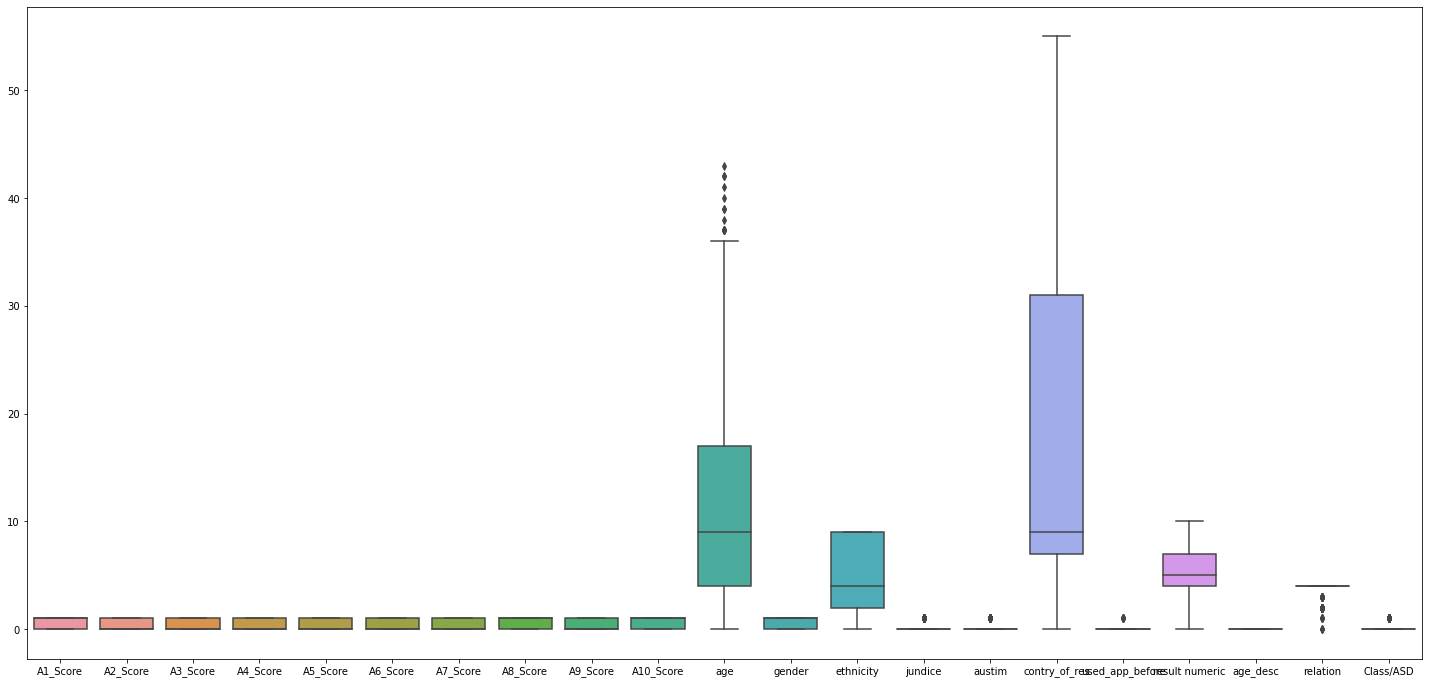

In [366]:
fig = plt.figure(figsize =(25, 12))
sns.boxplot(data=df)
plt.show() # the boxplot showing the outliers

## Comme indiqué, seul l'attribut "age" a des valeurs aberrantes. Nous devons donc le gérer en utilisant les centiles. Nous avons 8 instances supérieures au seuil maximum et 0 instance inférieure au minimum

In [367]:
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          74
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
age_desc            0
relation           74
Class/ASD           0
dtype: int64

In [368]:
#Explore samples that are above 99.1% percentile and below 1% percentile rank

min_thresold, max_thresold = df.age.quantile([0.01,0.99])
min_thresold, max_thresold

(0.0, 39.0)

### les instances des valeurs aberrantes de l'attribut "age":

In [369]:
df[df.age  > max_thresold]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,age_desc,relation,Class/ASD
6,1,1,1,1,0,0,0,0,1,0,...,1,9,0,0,2,0,6,0,2,0
202,1,1,1,1,1,1,1,0,1,1,...,0,9,0,1,9,0,10,0,3,1
430,1,1,1,1,1,1,1,1,1,1,...,1,9,1,1,55,0,2,0,4,1
447,1,1,1,1,1,1,1,0,1,1,...,1,9,0,0,9,0,10,0,4,1
494,1,0,1,1,0,0,0,0,0,0,...,0,9,0,0,9,0,4,0,4,0


In [370]:
df[df.age < min_thresold]


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,age_desc,relation,Class/ASD


### supprimer les valeurs aberrantes

In [371]:
df = df[(df.age <=max_thresold) & (df.age>=min_thresold)]
df.shape

(504, 21)

### Après avoir supprimé les valeurs aberrantes, nous pouvons voir le boxplot

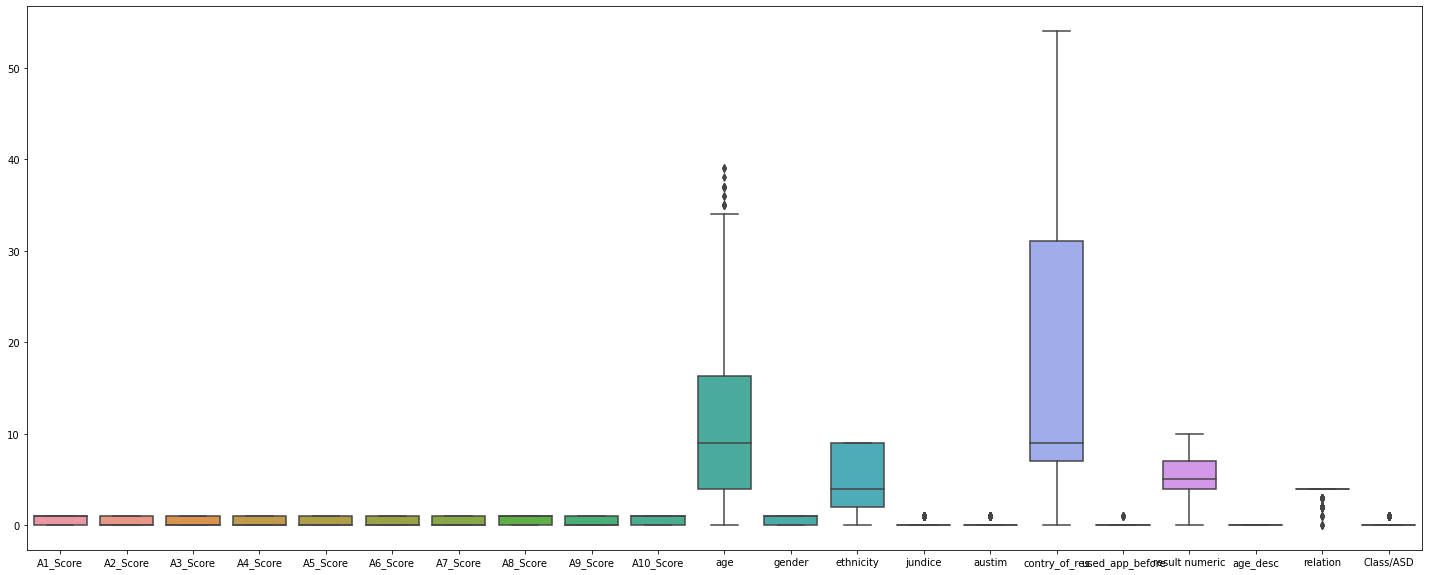

In [372]:
fig = plt.figure(figsize =(25, 10))
sns.boxplot(data=df)
plt.show() 

## intégration de données

<AxesSubplot:xlabel='Class/ASD', ylabel='count'>

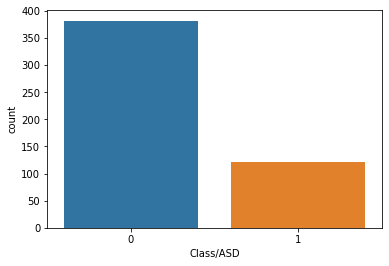

In [373]:
sns.countplot(x='Class/ASD', data=df)

In [374]:
# fig1 = plt.figure(figsize=(6,6))
# sns.pairplot(df.iloc[:,1:],hue='Class/ASD',palette='Set2')

### Heatmap montrant la matrice de corrélation### Heatmap showing the correlation matrix

<AxesSubplot:>

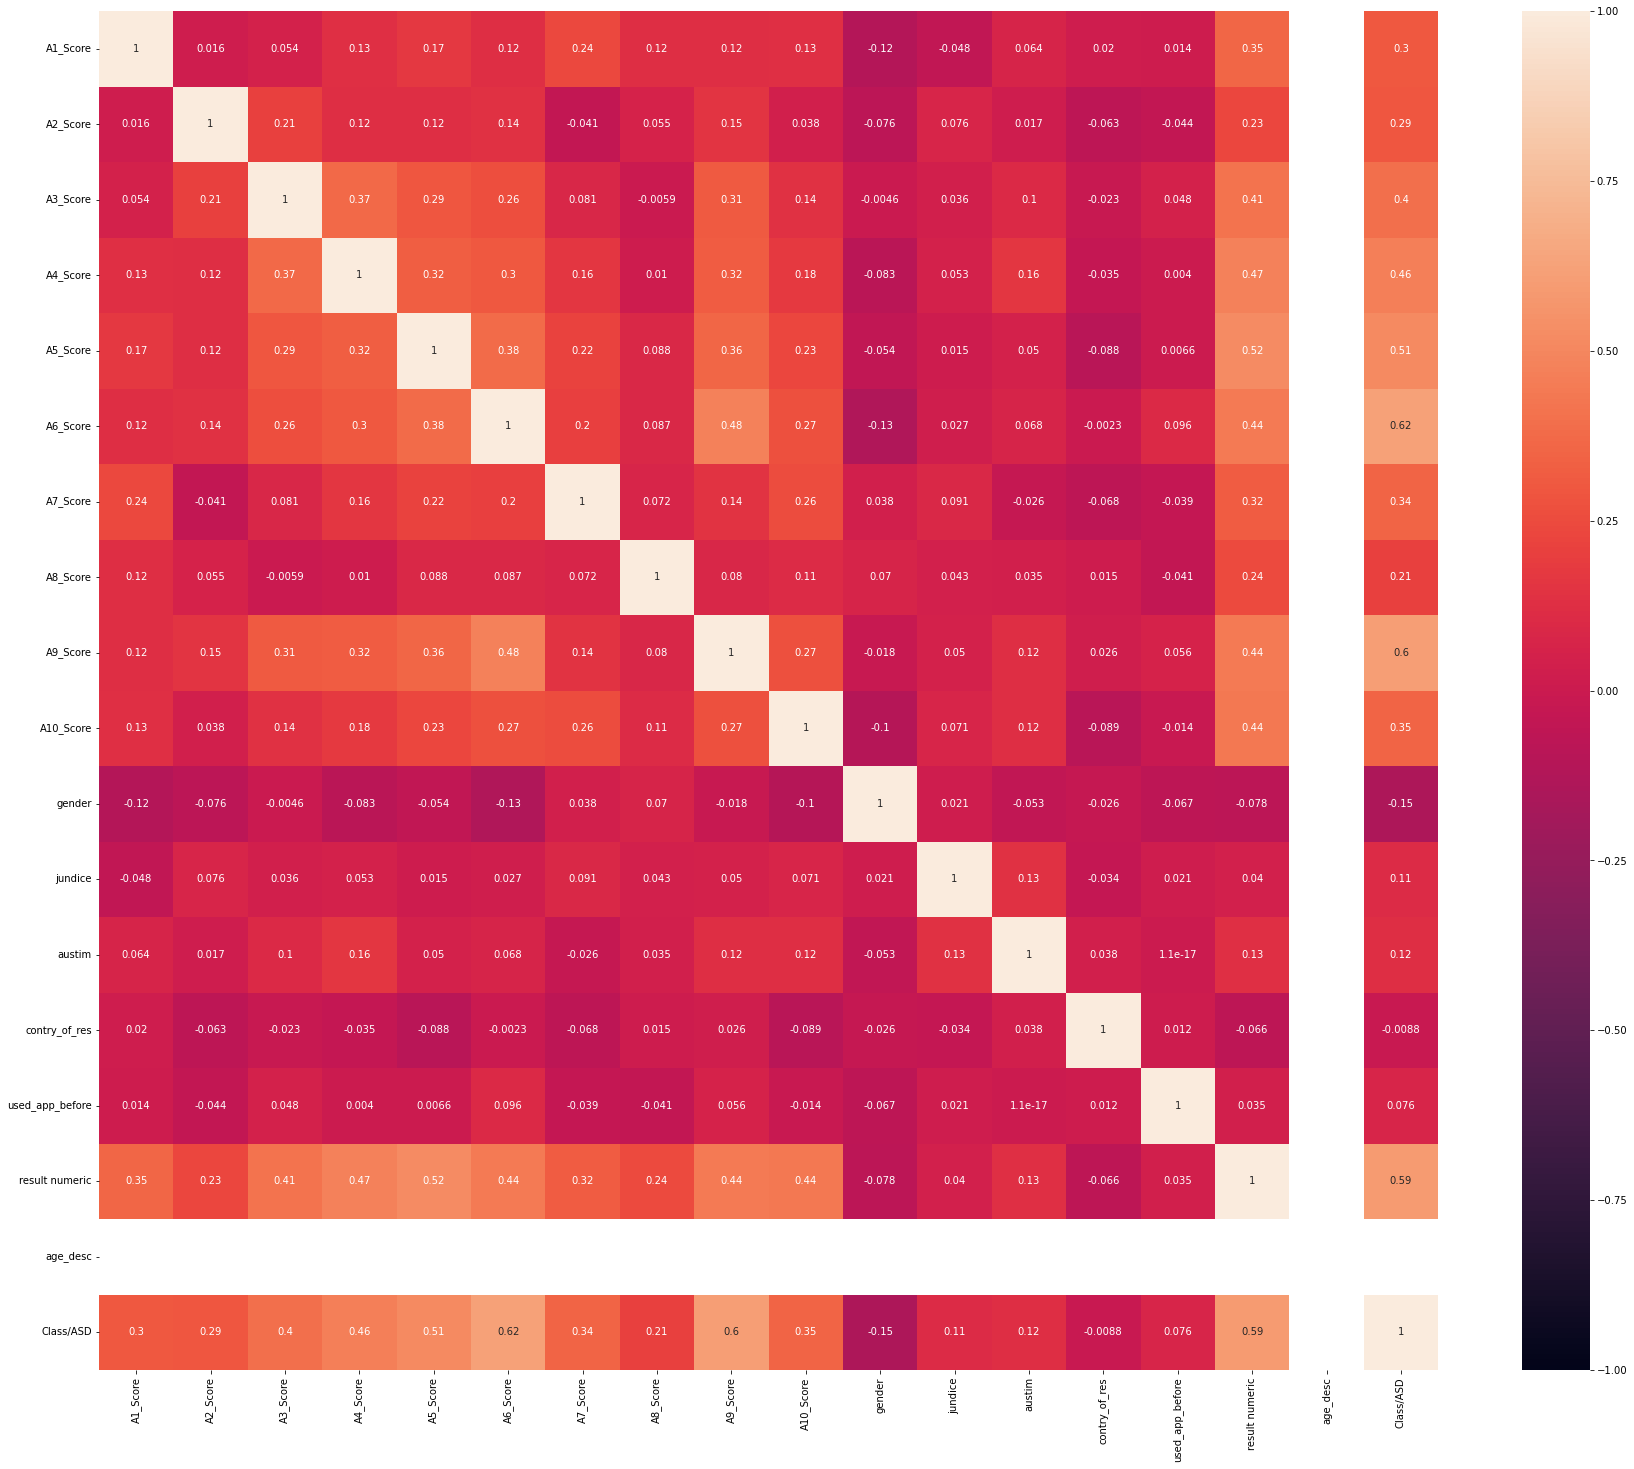

In [375]:
fig2 = plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),vmax=1.0,vmin=-1.0,annot=True)

### Countplot de tous les attributs

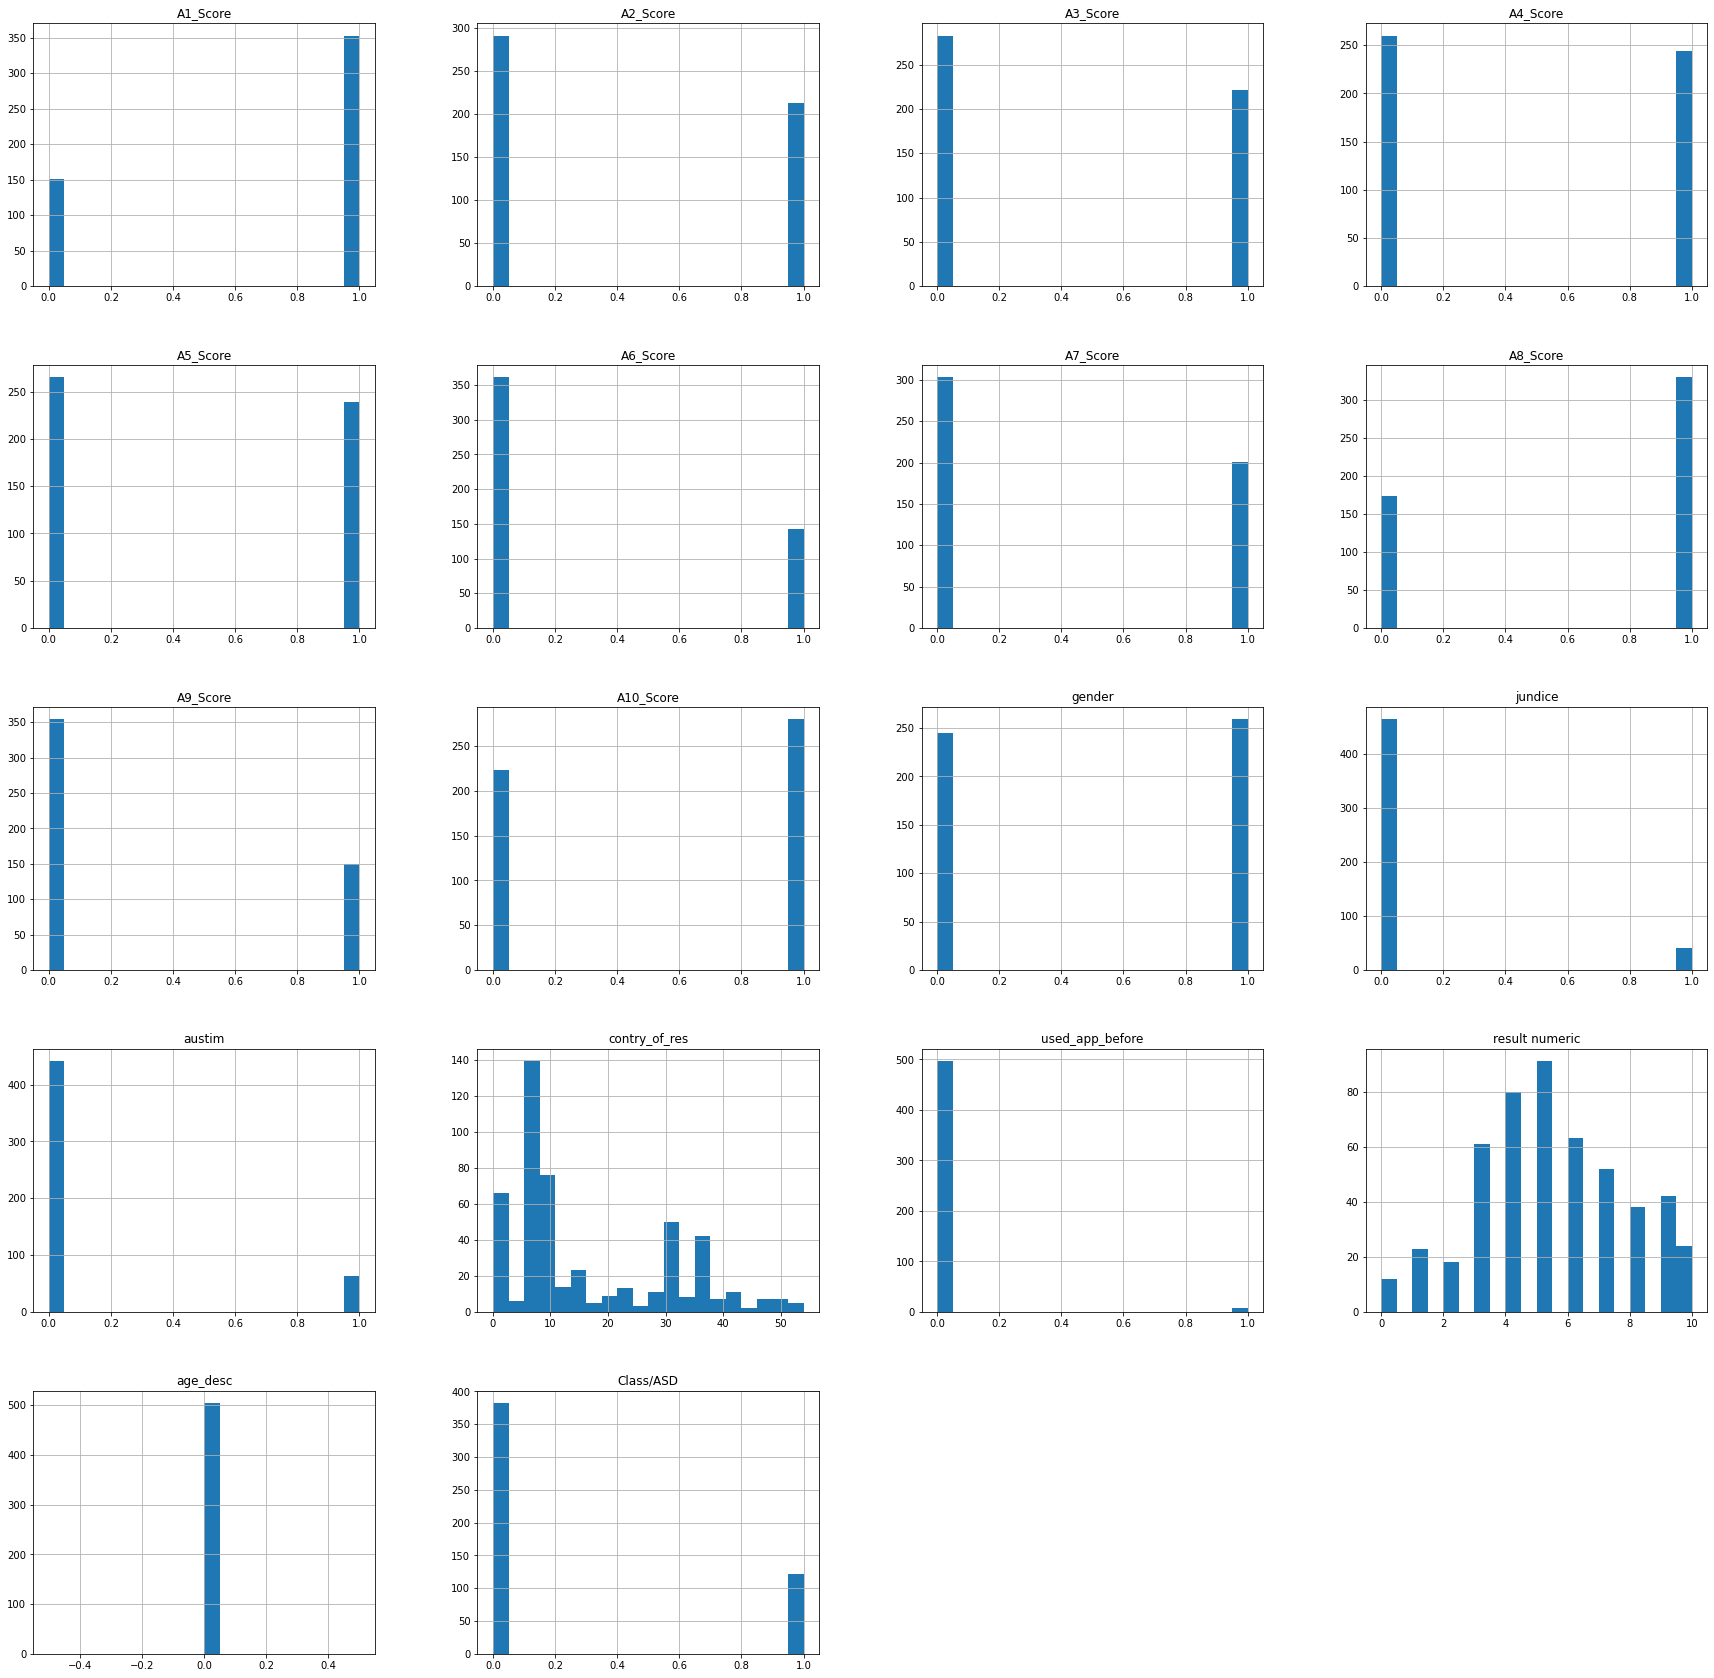

In [376]:
df.hist(bins=20, figsize=(30,30)); 

 Pour jouer un examen global, la matrice de corrélation considère les différentes qualités présentes dans la Dataframe.

 Les qualités présentes dans le cadre relationnel doivent être communiquées sous forme de valeur décimale dans la portée [-1,+1] montrant une corrélation inverse ou une relation immédiate individuellement.

 Au moment où la valeur déterminée de la relation est proche de la valeur 0, il est absurde de s'attendre à caractériser la corrélation entre les attributs considérés.

 Il n'y a pas de corrélation pour tous les attributs sauf « age_desc ». Donc il faut le supprimer

In [377]:
df =df.drop(columns=["age_desc"]) # removing the age_desc column


In [378]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,relation,Class/ASD
0,1,1,0,1,0,0,0,1,0,1,7,1,5,0,1,20,0,6,4,0
1,1,1,0,1,1,0,1,1,1,1,10,1,5,1,1,51,0,9,2,1
2,1,1,0,1,0,0,1,1,0,1,18,0,9,0,1,9,0,7,4,0
3,1,0,0,0,0,0,0,1,0,0,24,0,NaN,0,0,26,0,3,NaN,0
4,1,1,1,1,1,0,1,1,1,1,19,1,6,1,0,9,0,10,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0,1,0,0,0,0,0,0,0,1,24,0,9,1,0,9,0,3,4,0
509,0,1,1,1,1,1,1,1,0,1,5,0,9,0,0,9,0,9,4,1
510,1,1,1,1,1,1,1,0,1,1,26,1,9,0,0,8,0,10,4,1
511,1,1,1,0,0,0,0,0,0,1,1,0,2,0,0,10,0,5,4,0


<AxesSubplot:>

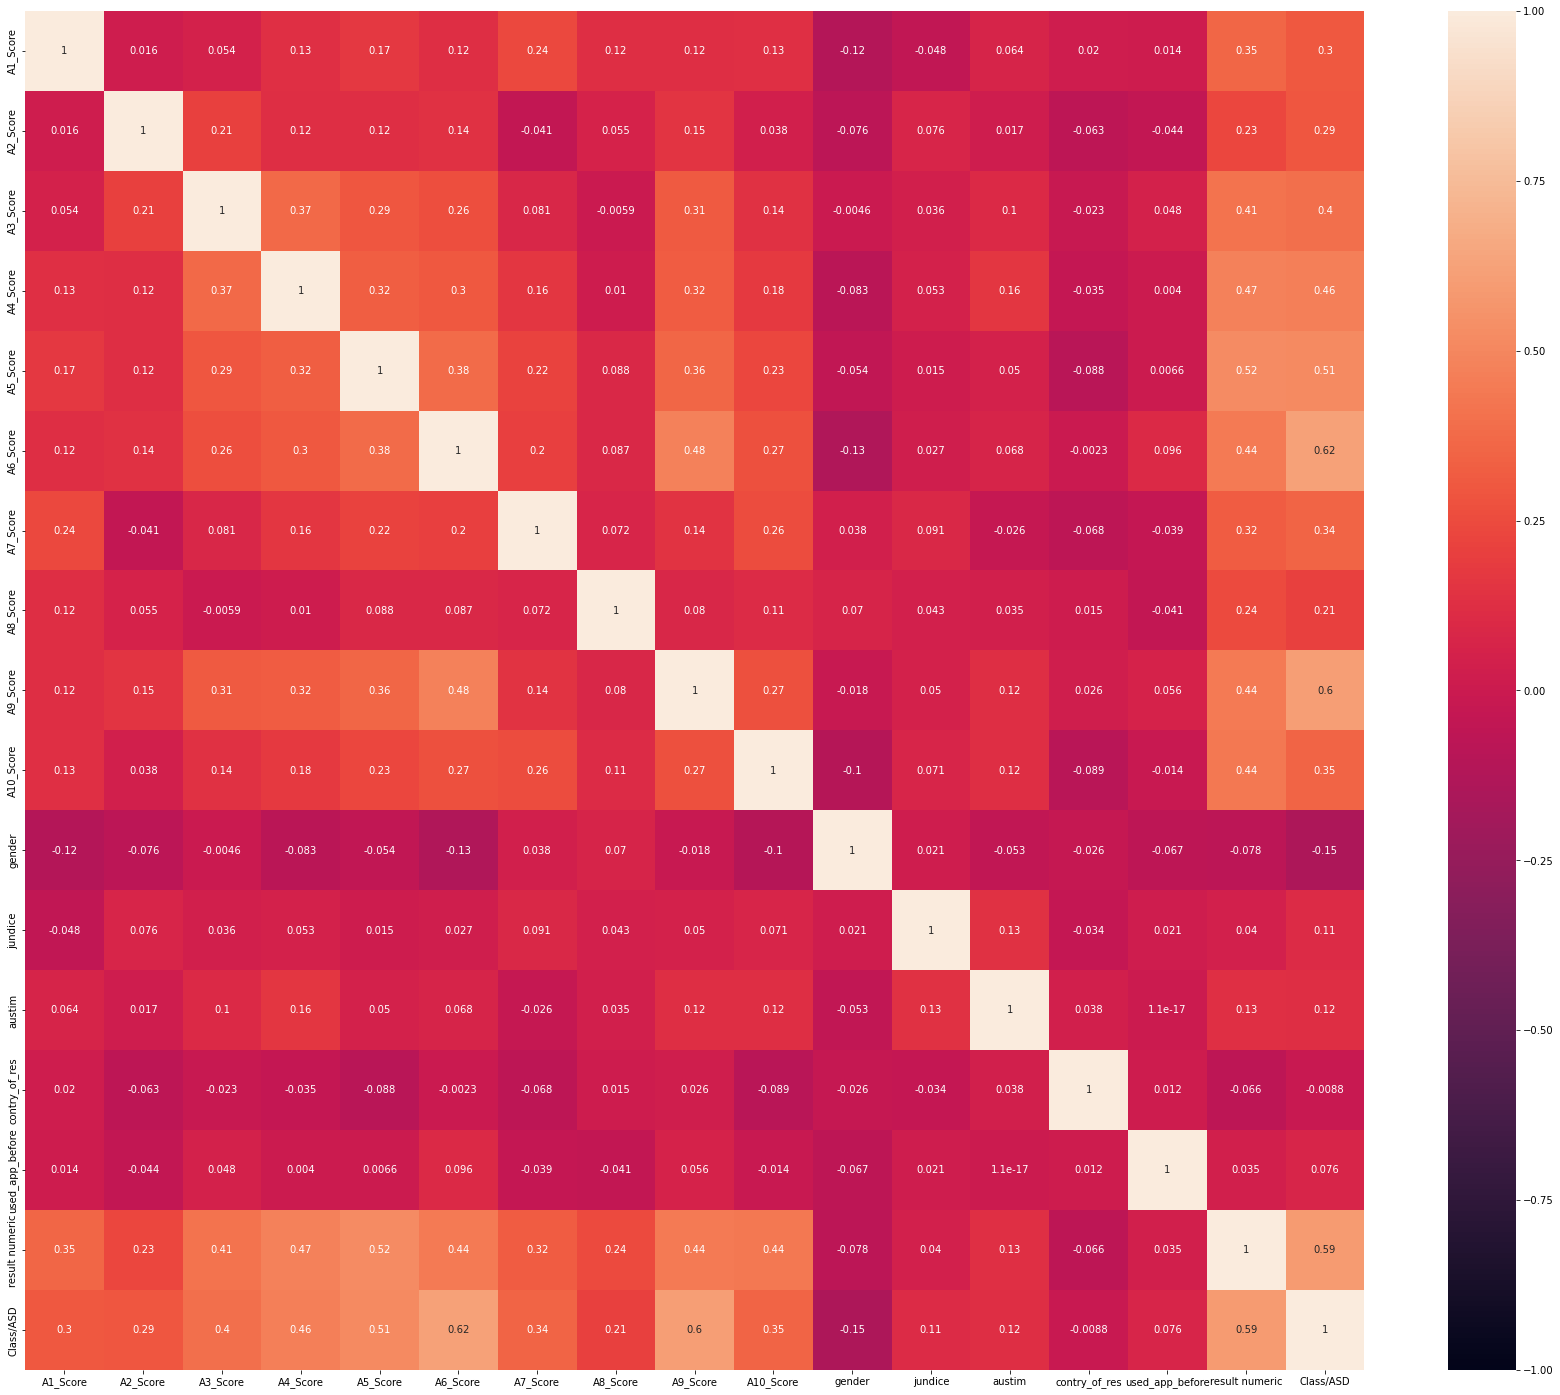

In [379]:
fig2 = plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),vmax=1.0,vmin=-1.0,annot=True) #correlation  matrix after removing the age_desc attributes 

### 3- Réduction des données :
Comme nous n'avons pas beaucoup d'attributs (seulement 20) et qu'il n'y a pas de grande corrélation entre eux, il n'est pas nécessaire de faire la "réduction des données". Sinon, la réduction à l'aide de l'ACP rendra impossible la visualisation des données ou leur analyse, il n'y a donc pas grand besoin de perdre ces fonctionnalités.

### 4- transformation des données :
Étant donné que les données sont binaires, 0 ou 1, et catégorielles, il n'est donc pas nécessaire de normaliser ou de standardiser.

### 5- Discrétisation des données :
Comme indiqué ci-dessous, les valeurs de toutes les données sont limitées, non continues, il n'est donc pas nécessaire d'appliquer la discrétisation des données.

# Three way clustering using GTRS

In [385]:
# df_U=df.copy()
df_Iris = df_Iris.rename(columns={df.columns[4]:'Class/ASD'})
df=df_Iris.copy()
df_U=df.copy()
df_U

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class/ASD
0,8.0,14.0,4.0,1.0,0
1,6.0,9.0,4.0,1.0,0
2,4.0,11.0,3.0,1.0,0
3,3.0,10.0,5.0,1.0,0
4,7.0,15.0,4.0,1.0,0
...,...,...,...,...,...
145,24.0,9.0,28.0,19.0,2
146,20.0,NaN,26.0,15.0,2
147,22.0,9.0,28.0,16.0,2
148,19.0,13.0,30.0,19.0,2


## 2.2.4 Division du jeu de données U en C et M 


In [386]:

set_M = df_U[df_U.isnull().values.any(axis=1)]
set_M

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class/ASD
13,0.0,NaN,1.0,0.0,0
48,10.0,16.0,5.0,NaN,0
55,NaN,7.0,21.0,9.0,1
61,NaN,9.0,18.0,11.0,1
64,13.0,8.0,NaN,9.0,1
122,NaN,7.0,41.0,16.0,2
146,20.0,NaN,26.0,15.0,2


In [387]:
set_CC = df_U[~df_U.isnull().values.any(axis=1)]
set_C = df_U[~df_U.isnull().values.any(axis=1)]
set_C

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class/ASD
0,8.0,14.0,4.0,1.0,0
1,6.0,9.0,4.0,1.0,0
2,4.0,11.0,3.0,1.0,0
3,3.0,10.0,5.0,1.0,0
4,7.0,15.0,4.0,1.0,0
...,...,...,...,...,...
144,24.0,12.0,33.0,21.0,2
145,24.0,9.0,28.0,19.0,2
147,22.0,9.0,28.0,16.0,2
148,19.0,13.0,30.0,19.0,2


In [388]:
#initialization of Class attributes for clustering label comparison 
df_U['Cluster'] = 0

In [389]:
# verification des valeurs de CLASSE, on a juste 0 et 1 alors on va choisir 2 cluster
df_U["Class/ASD"].value_counts()
num_clusters = len(df_U["Class/ASD"].value_counts())
num_clusters

3

# 2.2.5 Clustering avec K-means

In [394]:
kmeans = KMeans(n_clusters=num_clusters, max_iter=50)       #n_clusters表示计算的聚类个数
kmeans.fit(set_C)

KMeans(max_iter=50, n_clusters=3)

In [395]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [396]:
# assign the label
set_C['Cluster'] = kmeans.labels_
set_C.head(10)

C:\Users\wzx\AppData\Local\Temp\ipykernel_15116\2827774184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_C['Cluster'] = kmeans.labels_


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class/ASD,Cluster
0,8.0,14.0,4.0,1.0,0,2
1,6.0,9.0,4.0,1.0,0,2
2,4.0,11.0,3.0,1.0,0,2
3,3.0,10.0,5.0,1.0,0,2
4,7.0,15.0,4.0,1.0,0,2
5,11.0,18.0,7.0,3.0,0,2
6,3.0,13.0,4.0,2.0,0,2
7,7.0,13.0,5.0,1.0,0,2
8,1.0,8.0,4.0,1.0,0,2
9,6.0,10.0,5.0,0.0,0,2


In [397]:
diff_count = set_C["Class/ASD"].ne(set_C["Cluster"]).sum()#比较不同元素的个数
count_set_C = len(set_C)
print("set_C总的样本个数是",count_set_C,"经过k-means聚类后错误的样本个数是",diff_count,"正确率为",diff_count/count_set_C)

set_C总的样本个数是 143 经过k-means聚类后错误的样本个数是 141 正确率为 0.986013986013986


# 2.2.6 Génération des valeurs manquantes

In [398]:
def addMissingValues(U,C):
    for col in C:
            col_missing_rate = U[col].isna().mean()
            vals_to_nan = C[col].dropna().sample(frac=col_missing_rate).index
            C.loc[vals_to_nan, col] = np.NaN
    return C


In [399]:
set_C=addMissingValues(df_U, set_C)

C:\Users\wzx\AppData\Local\Temp\ipykernel_15116\2414407760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C.loc[vals_to_nan, col] = np.NaN


In [400]:
set_C.isnull().sum()

SepalLengthCm    3
SepalWidthCm     2
PetalLengthCm    1
PetalWidthCm     1
Class/ASD        0
Cluster          0
dtype: int64

# 2.2.7 Division C en Uc et Um

In [401]:
set_Um = set_C[set_C.isnull().values.any(axis=1)]
set_Uc=set_C[~set_C.isnull().values.any(axis=1)]
set_Um

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class/ASD,Cluster
3,3.0,10.0,5.0,NaN,0.0,2.0
24,5.0,NaN,8.0,1.0,0.0,2.0
39,NaN,13.0,5.0,1.0,0.0,2.0
65,24.0,10.0,NaN,10.0,1.0,0.0
68,NaN,1.0,21.0,11.0,1.0,0.0
80,12.0,NaN,14.0,7.0,1.0,0.0
93,NaN,2.0,10.0,6.0,1.0,2.0


In [402]:
set_Uc

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class/ASD,Cluster
0,8.0,14.0,4.0,1.0,0.0,2.0
1,6.0,9.0,4.0,1.0,0.0,2.0
2,4.0,11.0,3.0,1.0,0.0,2.0
4,7.0,15.0,4.0,1.0,0.0,2.0
5,11.0,18.0,7.0,3.0,0.0,2.0
...,...,...,...,...,...,...
144,24.0,12.0,33.0,21.0,2.0,1.0
145,24.0,9.0,28.0,19.0,2.0,1.0
147,22.0,9.0,28.0,16.0,2.0,1.0
148,19.0,13.0,30.0,19.0,2.0,1.0


# 4- Application de l’approche Three-way clustering


#  2.2.8 Calcul de la fonction d’évaluation 

In [403]:
#donne la distance entre deux object en ignorant les valeur manquant
def dis(Oi,Oj,M,C):
    diff=0
    for i in M.columns[:-2]: #-2因为最后两列是决策属性
        diff +=np.nansum(M[i][Oi]-C[i][Oj])**2 #先选择列再选择行的链式操作，达到的效果是一样的
    return np.sqrt(diff)

In [404]:
#chaque objet de set_Um avec tout les objet de set_Uc
def distance(M,C):
    dist=[]
    l = -1
    for i in M.index:
        l = l+1
        dist.append([])
        for j in C.index:
            dist[l].append(dis(i,j,M,C))
    Table =pd.DataFrame(dist,M.index,C.index)
    return Table

In [405]:
## déterminer les Kèmes voisins proches
#Trier ces distances et calculer les voisins les plus proches pour chaque oi avec des valeurs manquantes
def neighbor_Um(k,M,C):
    list_Index = M.index.tolist()
    print(list_Index)
    list_Index
    distance_matrix=distance(M,C)
    K_N=[]
    for i in list_Index:
          K_N.append(distance_matrix.loc[i].sort_values().head(k))
    return K_N
# neighbor_Um(7,set_Um,set_Uc)

In [406]:
distance(set_Um,set_Uc)

,0,1,2,4,5,6,7,8,9,10,...,139,140,141,142,143,144,145,147,148,149
3,6.480741,3.316625,2.449490,6.480741,11.489125,3.162278,5.000000,3.000000,3.000000,10.000000,...,33.970576,34.205263,31.827661,25.377155,37.215588,35.057096,31.160873,29.849623,29.832868,25.573424
24,5.000000,4.123106,5.099020,4.472136,6.403124,4.582576,3.605551,5.656854,3.316625,6.708204,...,34.365681,36.027767,33.555923,25.632011,38.118237,37.229021,32.939338,30.232433,31.685959,25.514702
39,1.414214,4.123106,2.828427,2.236068,5.744563,1.414214,0.000000,5.099020,3.162278,3.000000,...,29.832868,33.151169,28.583212,27.000000,35.042831,34.423829,29.478806,27.748874,30.805844,25.865034
65,18.788294,20.149442,21.954498,19.874607,16.792856,22.671568,19.467922,24.779023,20.591260,16.911535,...,7.280110,10.000000,9.219544,11.045361,9.110434,11.180340,9.055385,6.403124,10.723805,9.000000
68,23.622024,21.283797,22.891046,24.186773,23.430749,22.671568,22.360680,20.928450,21.400935,24.103942,...,14.071247,16.822604,13.453624,8.774964,18.973666,19.104973,13.304135,11.747340,17.000000,10.440307
80,12.328828,13.114877,14.866069,12.688578,8.124038,14.352700,11.916375,16.031220,12.884099,10.862780,...,23.494680,25.238859,22.561028,15.556349,27.459060,26.476405,22.000000,19.416488,21.189620,15.297059
93,14.317821,10.488088,12.449900,15.165751,16.552945,13.152946,13.076697,9.848858,11.180340,15.684387,...,24.186773,27.276363,22.847319,19.646883,29.580399,29.223278,23.280893,21.748563,26.267851,20.049938


In [407]:
Nei_DF =pd.DataFrame(neighbor_Um(7,set_Um,set_Uc))

[3, 24, 39, 65, 68, 80, 93]


In [408]:
Nei_DF

,47,29,30,45,12,2,8,11,25,34,...,69,81,89,82,92,79,57,60,98,62
3,1.414214,1.732051,2.236068,2.44949,2.44949,2.44949,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,2.236068,2.000000,NaN,NaN,NaN,NaN,2.0,2.828427,3.316625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.414214,1.414214,2.828427,3.316625,3.741657,3.741657,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.477226,3.162278,NaN,NaN,NaN,3.162278,1.0,2.236068,2.44949,6.082763


In [409]:
#calculer la fonction d'évaluation e(ck, j)  表示缺失值对象xj和聚类ck之间的评估函数
#k : nombre de voisins de j   表示k个临近节点  k_cluster表示聚类的数目。
#j= objet de set_Um qui est contient des valeurs manquantes
def evaluation (k,j,k_cluster):
    ev=[]
    C=0
    df1=set_C
    for l in range(k_cluster):
        C=0
        for i in Nei_DF.loc[j].dropna().index:
            if df1.loc[i].loc["Cluster"]== l: 
                    C+=1
        ev.append(C/k)
    return ev

In [410]:
##Déterminer les étiquettes des clusters que nous avonsdef init_list_clusters(k_cluster):
def init_list_clusters(k_cluster):
    list_cluster=[]
    for j in range(k_cluster):
            list_cluster.append("C"+str(j))
    return list_cluster

In [411]:
def eval_all(k_cluster,k,M):
    list_objects=[]
    list_evaluation=[]
    list_cluster=[]
    list_Index = M.index.tolist()
    for i in range(len(list_Index)):
        #list_index[i]: each object oi from Um
        list_objects.append(list_Index[i])
        list_evaluation.append(evaluation(k,list_Index[i],k_cluster))
    df3 = pd.DataFrame(list_evaluation, index = list_objects, columns = init_list_clusters(k_cluster))
    return df3

In [412]:
eval_all(num_clusters,7,set_Um)

,C0,C1,C2
3,0.000000,0.000000,1.000000
24,0.000000,0.000000,1.000000
39,0.000000,0.000000,1.000000
65,0.714286,0.285714,0.000000
68,1.000000,0.000000,0.000000
80,1.000000,0.000000,0.000000
93,0.571429,0.000000,0.428571


In [413]:
# 
def three_way (alpha,beta,k_cluster,k,M):
    list1=[]
    i=0
    df = eval_all(k_cluster,k,M).T
    object_list=df.columns
    cluster_list=df.index.tolist()
    for c in cluster_list:
        inside=[]
        outside=[]
        partial=[]
        list1.append([])
        for o in object_list:
            if (df.loc[c][o]>=alpha):
                inside.append(o)
            elif (df.loc[c][o]<alpha and df.loc[c][o]>beta):
                partial.append(o)
            elif df.loc[c][o] <= beta:
                outside.append(o)
        list1[i].append(c)
        list1[i].append(inside)
        list1[i].append(outside)
        list1[i].append(partial)
        i=i+1
        df3 = pd.DataFrame(list1,columns=["cluster","Inside","Outside","Partial"])
        df3=df3.set_index('cluster')
    return df3

In [414]:
three_way(1,0,num_clusters,7,set_Um)

,Inside,Outside,Partial
cluster,,,
C0,"[68, 80]","[3, 24, 39]","[65, 93]"
C1,[],"[3, 24, 39, 68, 80, 93]",[65]
C2,"[3, 24, 39]","[65, 68, 80]",[93]


# 5- Three-Way Clustering en utilisant GTRS

In [415]:
df1=set_C
df5 =three_way(1,0,num_clusters,7,set_Um)

Totaly_clustred=0
for i in init_list_clusters(num_clusters):
    Totaly_clustred += len(df5["Inside"].loc[i])
    
Totaly_clustred
correctly_Clustred=0
for i in init_list_clusters(num_clusters):
    for j in df5["Inside"].loc[i]:
        if df1.loc[j].loc["Cluster"]== int(i[1:]):
            correctly_Clustred+=1

correctly_Clustred

5

In [416]:
## Utility
def Utility (alpha,beta,k_cluster,k):
   
    df4 = eval_all(k_cluster,k,set_Um).T
    object_list=df4.columns
    cluster_list=df4.index.tolist()
    df5 =three_way (alpha,beta,k_cluster,k,set_Um)
    Totaly_clustred=0
    for i in cluster_list:
        Totaly_clustred += len(df5["Inside"].loc[i])
    correctly_Clustred=0
    for i in cluster_list:
        for j in df5["Inside"].loc[i]:
            if df1.loc[j].loc["Cluster"]== int(i[1:]):
                correctly_Clustred+=1
    accuracy=correctly_Clustred/Totaly_clustred
    generality=Totaly_clustred/len(set_Um)
    return accuracy,generality

In [417]:
def payoff(alpha,beta,alpha_,alpha__,betaplus,betaplus2,k_cluster,k): 
    accuracy=Utility(alpha,beta,k_cluster,k)[0] #initialization d''accuracy par alpha=1 et beta=0
    generality=Utility(alpha,beta,k_cluster,k)[1] #initialization de generality par alpha=1 et beta=0

    max_iteration=5 # definir le nombre d'iteration maximal
    iteration=0 # initialization de l'iteration
    list_accuracy=[]#list player A accuracy 
    list_generality=[] #list player G generality
    list_final_accuracy=[]#list accuracy
    list_final_generality=[]#list generality
    list_alpha=[]#list alpha
    list_beta=[]#listbeta

    list_final_accuracy.append(accuracy) #append la liste des accuracy par la valeur de accuracy du 1er ietration
    list_final_generality.append(generality)  #append la liste des generality par la valeur de generality du 1er ietration
    list_alpha.append(alpha)  #append la liste des Alphas par la valeur de Alpha du 1er ietration =1
    list_beta.append(beta)  #append la liste des Betas par la valeur de Beta du 1er ietration =0
    
    
    
    while (accuracy>generality and alpha>0.5 and beta < 0.5 and iteration<max_iteration):
        list_accuracy=[] #declaration de list d'accuracy pour construire payoff table
        list_generality=[] #declaration de list de generality pour construire payoff table
        
#         print(alpha,beta,accuracy,generality)
        
        #calcul accuracy 
        accuracy_alphamoins2_beta=Utility(alpha__,beta,k_cluster,k)[0]
        accuracy_alphamoins_betaplus=Utility(alpha_,betaplus,k_cluster,k)[0]
        accuracy_alphamoins2_betaplus=Utility(alpha__,betaplus,k_cluster,k)[0]
        accuracy_alpha_betaplus2=Utility(alpha,betaplus2,k_cluster,k)[0]
        accuracy_alphamoins_betaplus2=Utility(alpha_,betaplus2,k_cluster,k)[0]
        accuracy_alphamoins2_betaplus2=Utility(alpha__,betaplus2,k_cluster,k)[0]
        
        #calcul des accuracies selon les strategies 
        
        #calcul generality
        generality_alphamoins2_beta=Utility(alpha__,beta,k_cluster,k)[1]
        generality_alphamoins_betaplus=Utility(alpha_,betaplus,k_cluster,k)[1]
        generality_alphamoins2_betaplus=Utility(alpha__,betaplus,k_cluster,k)[1]
        generality_alpha_betaplus2=Utility (alpha,betaplus2,k_cluster,k)[1]
        generality_alphamoins_betaplus2=Utility(alpha_,betaplus2,k_cluster,k)[1]
        generality_alphamoins2_betaplus2=Utility(alpha__,betaplus2,k_cluster,k)[1]
        
        #calcul des generalities selon les strategies 

        
        #populate matrix payoff
        #premiere ligne joueur A
        l1=[accuracy_alphamoins2_beta,accuracy_alphamoins_betaplus
            ,accuracy_alphamoins2_betaplus]
        #deuxieme ligne joueur A
        l2=[accuracy_alphamoins_betaplus,accuracy_alpha_betaplus2
            ,accuracy_alphamoins_betaplus2]
        #troisieme ligne joueur A
        l3=[accuracy_alphamoins2_betaplus,accuracy_alphamoins_betaplus2
            ,accuracy_alphamoins2_betaplus2]
        #player A list
        list_accuracy.append(l1)
        list_accuracy.append(l2)
        list_accuracy.append(l3)
        
        #premiere colonne joueur G
        c1=[generality_alphamoins2_beta,generality_alphamoins_betaplus
            ,generality_alphamoins2_betaplus]
        #deuxieme colonne joueur G
        c2=[generality_alphamoins_betaplus,generality_alpha_betaplus2
            ,generality_alphamoins_betaplus2]
        #troisieme colonne joueur G
        c3=[generality_alphamoins2_betaplus,generality_alphamoins_betaplus2
            ,generality_alphamoins2_betaplus2]
        #player B list
        list_generality.append(c1)
        list_generality.append(c2)
        list_generality.append(c3)
            
        P_A=np.array(list_accuracy)       #player A
        P_G=np.array(list_generality)     #player G
        game = nash.Game(P_A,P_G)         #game
        
        #Nash Equilibrium
        equilibria = game.support_enumeration()
        for eq in equilibria:
            b=eq
        sigma_r = b[0].tolist()
        sigma_c = b[1].tolist()                    
        accuracy,generality = game[sigma_r, sigma_c]     
        
        #stratégies gagnantes
        #changement de valeurs de alpha et beta 
        ia=b[0].tolist().index(1)
        ib=b[1].tolist().index(1)
        a,b=["alpha_","betaplus","alpha_betaplus"][ia],["alpha_","betaplus","alpha_betaplus"][ib]
        #alpha,beta,alpha_,alpha__,betaplus,betaplus2,
        if a=="alpha_" and b=="alpha_":
            alphaprim = alpha__
            betaprim = beta
        if a=="alpha_" and b=="betaplus":
            alphaprim =alpha_
            betaprim = betaplus
        if a=="alpha_" and b=="alpha_betaplus":
            alphaprim = alpha__
            betaprim = betaplus
        if a=="betaplus" and b=="alpha_":
            alphaprim = alpha_
            betaprim = betaplus
        if a=="betaplus" and b=="betaplus":
            alphaprim = alpha
            betaprim = betaplus2
        if a=="betaplus" and b=="alpha_betaplus":
            alphaprim =alpha_
            betaprim =betaplus2
        if a=="alpha_betaplus" and b=="alpha_":
            alphaprim = alpha__
            betaprim = betaplus
        if a=="alpha_betaplus" and b=="betaplus":
            alphaprim = alpha_
            betaprim = betaplus2
        if a=="alpha_betaplus" and b=="alpha_betaplus":
            alphaprim =alpha__
            betaprim = betaplus2
            
        
        alpha0=alpha # enregistrement de valeur de alpha de l'iteration i-1
        beta0=beta #enregistrement de valeur de beta de l'iteration i-1 
        
        #calcul alpha_, alpha__, betaplus, betaplus2
        c = 1.5
        alpha_=alpha-(alpha*Utility(alphaprim,betaprim,k_cluster,k)[1]-
                      Utility(alpha,beta,k_cluster,k)[1])
        alpha__=alpha-c*(alpha*Utility(alphaprim,betaprim,k_cluster,k)[1]-
                         Utility(alpha,beta,k_cluster,k)[1])
        betaplus=beta-(beta*Utility(alphaprim,betaprim,k_cluster,k)[1]-
                       Utility(alpha,beta,k_cluster,k)[1])
        betaplus2=beta-c*(beta*Utility(alphaprim,betaprim,k_cluster,k)[1]-
                          Utility(alpha,beta,k_cluster,k)[1])
        
        #alpha,beta=alphaprim,betaprim
        alpha=alphaprim
        beta=betaprim
        
#         print(sigma_r,sigma_c,alpha,beta,accuracy,generality)
        
        #redifine accuracy and genereality
        accuracy = Utility(alpha,beta,k_cluster,k)[0] 
        generality= Utility(alpha,beta,k_cluster,k)[1]
        #remplir les listes 
        list_final_accuracy.append(accuracy)
        list_final_generality.append(generality)
        list_alpha.append(alpha)
        list_beta.append(beta)
        
        iteration=iteration+1
    return list_final_accuracy, list_final_generality, list_alpha, list_beta, alpha0,beta0

In [419]:
a = payoff(1,0,0.85,0.8,0.15,0.2,num_clusters,7)
print(a)
print(type(a[3]))
# alpha
# beta
# list_final_accuracy = []
# list_final_generality = []
# list_alpha = []
# list_beta = []
alpha,beta,list_final_accuracy,list_final_generality,list_alpha,list_beta=a[4],a[5],a[0],a[1],a[2],a[3]
# # payoff(1,0,0.85,0.8,0.15,0.2,3,7)[4]
# ,payoff(1,0,0.85,0.8,0.15,0.2,3,7)[5],
# payoff(1,0,0.85,0.8,0.15,0.2,3,7)[0],
# payoff(1,0,0.85,0.8,0.15,0.2,3,7)[1]
# ,payoff(1,0,0.85,0.8,0.15,0.2,3,7)[2],
# payoff(1,0,0.85,0.8,0.15,0.2,3,7)[3]





([1.0, 1.0, 1.0], [0.7142857142857143, 0.7142857142857143, 0.7142857142857143], [1, 0.8, 1.0], [0, 0.2, 1.0714285714285714], 0.8, 0.2)
<class 'list'>


In [420]:

d= {'alpha':list_alpha, 'beta': list_beta,'accuracy': list_final_accuracy,'generality':list_final_generality}
df = pd.DataFrame(data=d)


In [421]:
df

,alpha,beta,accuracy,generality
0,1.0,0.000000,1.0,0.714286
1,0.8,0.200000,1.0,0.714286
2,1.0,1.071429,1.0,0.714286


### Après 3 itérations, la boucle s'arrête car beta est devenu >0.5
### La précision est toujours de 100 % et la généralité est passée de 95 % à 96,5 %
### La précision peut rester la même valeur même si la généralité a changé, car la précision est des objets "correctement regroupés", par exemple supposons à la 1ère itération que nous avons 20 objets "regroupés" et que les 20 sont correctement regroupés alors précision = 1 , et dans la 2ème itération la généralité est passée à 25 objets "en cluster" et même les 25 objets sont "correctement regroupés", dans cet exemple la précision est toujours de 100% et la généralité a changé.

In [422]:
distance(set_M,set_CC)

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,147,148,149
13,8.544004,6.708204,4.472136,5.000000,7.615773,12.529964,4.242641,8.062258,3.162278,7.211103,...,38.948684,39.204592,36.769553,30.016662,42.201896,40.000000,36.124784,34.828150,34.669872,30.528675
48,3.000000,8.124038,8.062258,9.219544,3.316625,3.000000,7.681146,4.242641,12.083046,7.211103,...,30.282008,31.000000,27.856777,24.677925,33.911650,31.559468,27.820855,26.870058,26.739484,23.853721
55,18.384776,17.117243,18.439089,16.278821,18.788294,17.804494,18.027756,17.088007,17.029386,16.278821,...,9.486833,11.401754,6.708204,6.082763,14.560220,13.000000,7.280110,7.280110,10.816654,6.324555
61,14.866069,14.000000,15.132746,13.038405,15.231546,14.212670,14.560220,13.601471,14.035669,13.038405,...,12.041595,14.035669,9.055385,9.486833,17.117243,15.297059,10.000000,10.000000,12.649111,9.000000
64,7.810250,7.071068,9.486833,10.198039,9.219544,10.198039,11.180340,7.810250,12.000000,7.280110,...,13.152946,11.180340,13.152946,2.828427,12.369317,11.704700,11.045361,9.055385,7.810250,3.162278
122,37.656341,37.054015,38.209946,36.124784,37.854986,35.735137,37.483330,36.496575,37.013511,36.124784,...,11.401754,9.486833,14.317821,14.035669,7.211103,9.433981,13.152946,13.152946,12.529964,14.142136
146,25.059928,26.076810,28.017851,27.018512,25.553865,21.023796,27.802878,24.698178,29.068884,25.238859,...,7.211103,7.211103,6.082763,5.099020,10.295630,8.062258,4.472136,2.828427,4.123106,4.123106


In [423]:
Nei_DF =pd.DataFrame(neighbor_Um(7,set_M,set_CC))
Nei_DF

[13, 48, 55, 61, 64, 122, 146]


,38,42,41,8,22,47,6,10,21,27,...,135,102,125,123,133,72,110,127,126,147
13,2.236068,2.236068,2.828427,3.162278,3.162278,4.242641,4.242641,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.236068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.472136,6.324555,6.403124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,2.236068,2.236068,2.236068,2.828427


In [424]:
Result =three_way(alpha,beta,num_clusters,7,set_M)

In [425]:
Result

,Inside,Outside,Partial
cluster,,,
C0,"[55, 61, 64]","[13, 48, 122]",[146]
C1,[122],"[13, 48, 55, 61, 64]",[146]
C2,"[13, 48]","[55, 61, 64, 122, 146]",[]


In [426]:
Totaly_clustred=0
for i in Result.index:
    print(i)
    Totaly_clustred += len(Result["Inside"].loc[i])
print(Totaly_clustred)
correctly_Clustred=0
for i in Result.index:
    correctly_ci=0#用来表示聚类i正确聚类的个数
    for j in Result["Inside"].loc[i]:
        if set_M.loc[j].loc["Class/ASD"]== int(i[1:]):
            correctly_ci+=1
            correctly_Clustred+=1
    print("聚类"+i+"的聚类个数是",len(Result["Inside"].loc[i]),"聚类"+i+"的正确聚类个数是：",correctly_ci)
    print("-----------")
accuracy=correctly_Clustred/Totaly_clustred
generality=Totaly_clustred/len(set_M)
print(accuracy,generality)

C0
C1
C2
6
聚类C0的聚类个数是 3 聚类C0的正确聚类个数是： 0
-----------
聚类C1的聚类个数是 1 聚类C1的正确聚类个数是： 0
-----------
聚类C2的聚类个数是 2 聚类C2的正确聚类个数是： 0
-----------
0.0 0.8571428571428571


In [427]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [428]:
from tabulate import tabulate

In [ ]:
col_names = ["Objets", "Cluster","Classification"]
data = []
Y_CLassification= set_M["Class/ASD"]
for i in range(len(Result.iloc[0][0])):
    data.append([])
    data[i].append(Result.iloc[0][0][i])
    data[i].append(0)
    data[i].append(set_M["Class/ASD"][Result.iloc[0][0][i]])



print(tabulate(data, headers=col_names, tablefmt="grid", showindex="always"))


In [ ]:
col_names = ["Objets", "Cluster","Classification"]
data = []
Y_CLassification= set_M["Class/ASD"]
for i in range(len(Result.iloc[1][0])):
    data.append([])
    data[i].append(Result.iloc[1][0][i])
    data[i].append(1)
    data[i].append(set_M["Class/ASD"][Result.iloc[1][0][i]])



print(tabulate(data, headers=col_names, tablefmt="grid", showindex="always"))


## Après avoir comparé les deux clusters avec la classification initiale on peut voir la grande différence de regroupement des objets pour le cluster 1, même si les objets du cluster dans le cluster 0, qui existent réellement dans la classe 0 (vrai négatif) sont plus que les faux positif et faux négatif

In [ ]:
from sklearn.metrics import silhouette_score



# intialise kmeans
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(set_CC)

cluster_labels_K = kmeans.labels_

# silhouette score
silhouette_avg_K = silhouette_score(set_CC, cluster_labels_K)
print("For n_clusters= 2, the silhouette score is {1}".format(i, silhouette_avg_K))



## Après cette comparaison, nous pouvons distinguer que le taux d'erreur élevé est dû au choix de l'algorithme K-means car après vérification des valeurs de silhouette, nous avons vu qu'il est de 0,48 inférieur à 0,5